In [1]:
# import packages that will be used for plotting and analyzing the data

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy
from scipy import stats
from sklearn.feature_selection import chi2
%matplotlib inline

In [2]:
df = pd.read_csv('Data/train.csv')

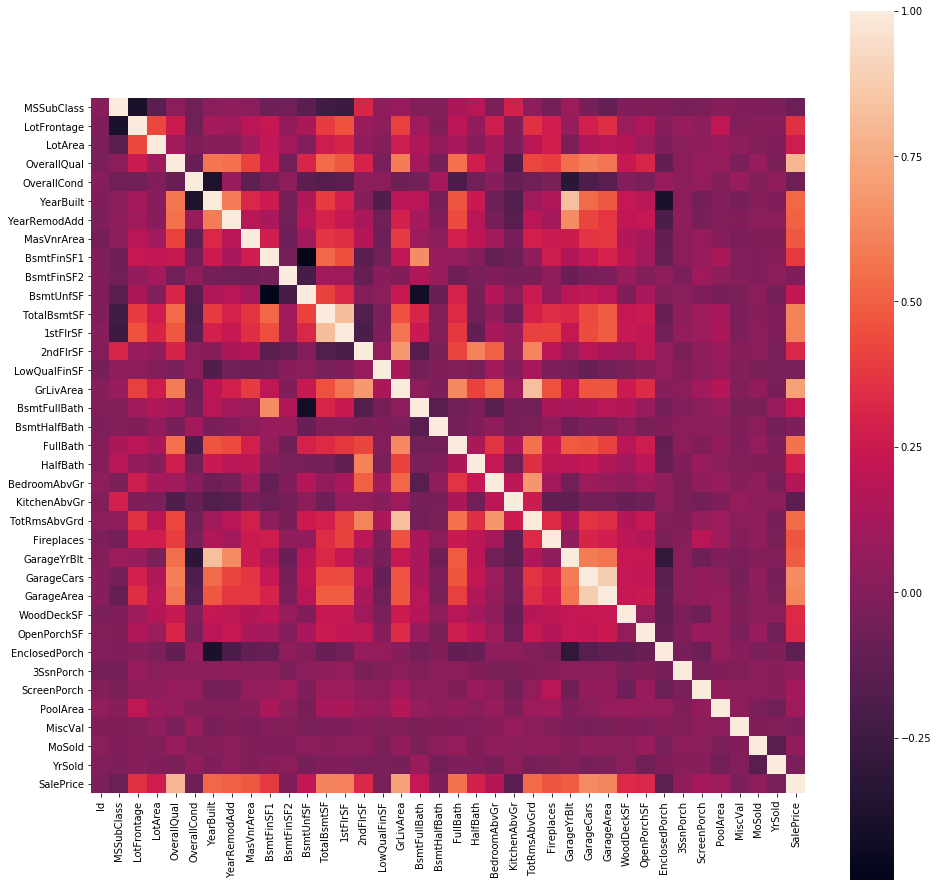

In [16]:
# create correlation matrix for numerical values 

f, ax = plt.subplots(figsize=(16, 16))
corrmat = df.corr()
sns.heatmap(corrmat[1:], vmax=1, square=True)

plt.show()

In [21]:
corrmat.SalePrice.sort_values(ascending=False)


SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

In [7]:
df_ANOVA = pd.DataFrame(columns=['fvalue', 'pvalue'])

In [10]:
for column in df:
    df2 = df.groupby(column)
    x = [df2['SalePrice'].get_group(x) for x in df2.groups]        
    df_ANOVA.loc[column] = [*stats.f_oneway(*x)]

C:\Users\wongk3.NA\AppData\Local\Continuum\Anaconda2\envs\newPy36\lib\site-packages\scipy\stats\stats.py:2967: RuntimeWarning: divide by zero encountered in double_scalars
  msw = sswn / float(dfwn)
C:\Users\wongk3.NA\AppData\Local\Continuum\Anaconda2\envs\newPy36\lib\site-packages\scipy\stats\stats.py:2968: RuntimeWarning: divide by zero encountered in double_scalars
  f = msb / msw


In [15]:
df_ANOVA.sort_values(['fvalue'], ascending=False)

,fvalue,pvalue
SalePrice,inf,0.000000e+00
ExterQual,443.334831,1.439551e-204
KitchenQual,407.806352,3.032213e-192
BsmtQual,392.913506,9.610615e-186
GarageCars,351.207486,1.121129e-211
OverallQual,349.026840,0.000000e+00
GarageFinish,250.962467,1.199117e-93
FullBath,246.067004,3.802188e-129
Fireplaces,146.741176,4.421001e-83
MasVnrType,111.672380,4.793331e-65
